In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def read_datasets(filename, column_list, target_column):

    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [10]:
def split_datasets(X, y, test_size = 0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [11]:
def plot_data(X_train, X_test, y_train, y_test):

    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [12]:
def normalize(X):

    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [13]:
def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [14]:
def hypothesis(X, theta):

    h_thetha = np.dot(X, theta)

    return h_thetha

In [15]:
def cost_function(X, y, theta):

    m = X.shape[0]
    if m == 0:
        return None

    h = hypothesis(X, theta) # predicted values
    J = (1 / (2 * m)) * np.sum(np.square(h - y))

    return J

In [16]:
def derivative(X, y, theta):
    m = X.shape[0]

    d_thetha = (1 / m) * np.dot(X.T, hypothesis(X, theta) - y)

    return d_thetha

In [17]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):

    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):

        theta = theta - alpha * derivative(X, y, theta)
        J = cost_function(X, y, theta)
        J_history.append(J)
        
        if print_J == True:
            print(J)
        delta = abs(J - J_history[-2])
        if delta < 1e-6 or num_iters > 10000000000:
            break 

    return theta, J_history

In [18]:
def plot_J(X, y):

    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()

    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код

In [34]:
X, y = read_datasets('burrito.csv', ["A"], "B")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


In [35]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [36]:
test_size = 0.2 #0.0
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


Відображення тренувальних і тестових даних

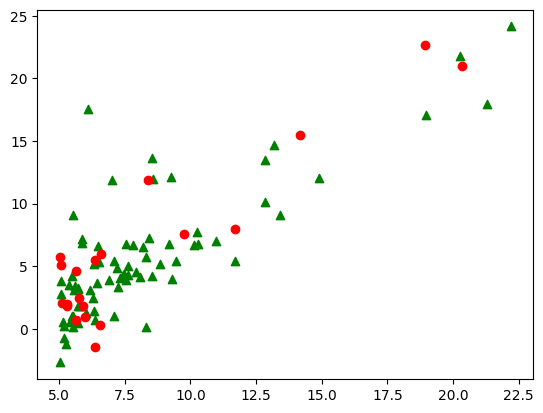

In [37]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних

In [38]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

In [39]:
y = y_train[:]

In [40]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
29.84187901989026


In [41]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та штрафної функції

In [42]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.734843129578689; Theta 1: 4.15883404895815


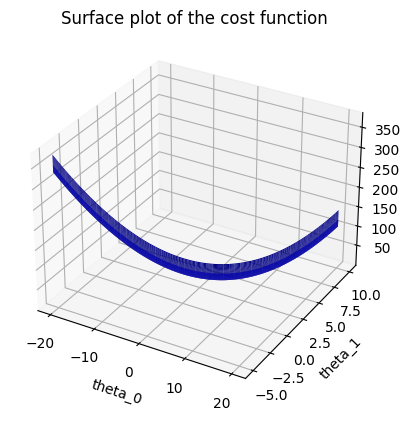

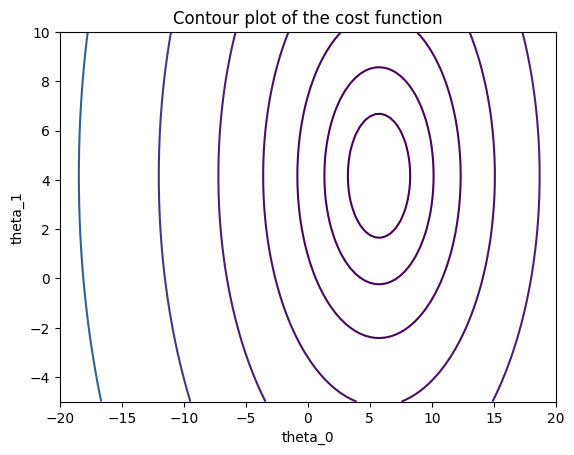

In [43]:
plot_J(X, y)

Вивід результатік тренування

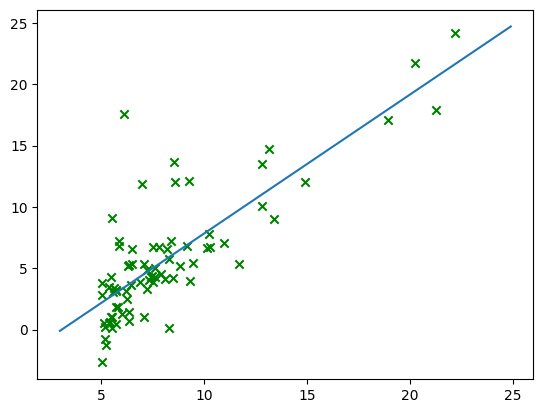

In [44]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки

In [45]:

X_test_proc = (X_test - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

print(rel_diff)
print(cost_function(X_test_proc, y_test, new_theta))

[3.03663753e+02 3.27211325e+01 3.38621399e+01 3.60700939e+02
 1.22050517e+03 4.95338089e+01 3.72350056e+01 2.63776820e+01
 2.06319024e+01 3.66386451e+01 2.46281344e+01 5.62796762e+01
 1.90613622e+01 2.19012124e+01 3.35330654e-01 6.13028111e+01
 1.11472174e+01 2.56047585e+02 6.87265275e+00 7.16953121e+01]
3.8472420430967134
